## Section 1: Importing libraries

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Section 2: Generating data

In [57]:
# Define a function that converts a into a line and stores the values accordingly
def generate_data_dict(line):
    
    line = line.rstrip("\n") # convert the row into a line by stripping over a new-line character
    data_rows = line.split(",") # split the values in the row by comma chacater
    
    # Return the value for each feature in a dictionary format
    return {'Source': data_rows[0], # the first value in a row - origin/source
            'Platform': data_rows[1], # the second value in a row - platform
            'Clickstream': data_rows[2:], # the remaining values in a row - pages visited
            '# of pages visited': len(data_rows[2:]),}   # the count of the pages visited

In [58]:
# Create a list that wil store the values for each visit
visitor_data_list = []

with open('clickstream_data.csv', 'r') as file: # open the dataset file
    
    rows = file.readlines() # read each row in the dataset
    
    for row in rows: # iterate through the rows
        
        data_dict = generate_data_dict(row) # store the values for each row intoa dictionary
        visitor_data_list.append(data_dict) # add the values into a list

file.close() # close the dataset file

# Convert the visit values into a dataframe
visitor_data_df = pd.DataFrame(data=visitor_data_list)

## Section 3: Analyzing data

In [59]:
purchase_success_status_list = [] # create a list to visits that ended up in success
drop_out_status_list = [] # create a list to visits that dropped out
single_page_status_list = [] # create a list to visits that visited only one page

# iterate through the indices of the dataframe
for index in visitor_data_df.index:

    clickstream_list = visitor_data_df.loc[index]['Clickstream'] # seperate the clickstream value, i.e., pages visited

    if 'purchase_success' in clickstream_list: # if the visit was successful, i.e., contains 'purhcase_success' page
        purchase_success_status_list.append(1)  # add 1 if YES
    else:  
        purchase_success_status_list.append(0) # add 0 if NO
        
    if 'purchase_start' in clickstream_list and 'purchase_success' not in clickstream_list: # if the visit was dropped out, i.e., entrance into purchasing page without a success
        drop_out_status_list.append(1) # add 1 if YES
    else:  
        drop_out_status_list.append(0) # add 0 if NO

    if len(clickstream_list) == 1: # if the visit contains only 1 page. i.e., a visitor bounced after a single page visit
        single_page_status_list.append(1) # add 1 if YES
    else:  
        single_page_status_list.append(0) # add 0 if NO
    
# add the respective list values into the dataframe
visitor_data_df['Conversion'] = purchase_success_status_list
visitor_data_df['Drop-out'] = drop_out_status_list
visitor_data_df['Bounce'] = single_page_status_list

### Section 3.1: Analyzing the sources

In [ ]:
# Groupyby all the values by source, summing the numeric values only
source_group_df = visitor_data_df.groupby('Source').sum(numeric_only=True)

In [61]:
# Create a list that stores the total number of visits per source
number_of_visits_per_source = list(visitor_data_df.groupby('Source').count()['Platform'])

# Add the total visits to the grouped by dataframe
source_group_df['Total Visits'] = number_of_visits_per_source

In [62]:
# Create a function that returns a ratio for a given metric given numerator, denominator, and dataframe
def generate_ratio(numerator, denominator, dataframe):
    
    ratios = [] # Create a list to store the ratio values
    
    for index in dataframe.index: # For each index

        numerator_value = dataframe.at[index, numerator] # Take the numeric from that index
        denominator_value = dataframe.at[index, denominator] # Take the denominator from that index

        ratio = numerator_value / denominator_value # Calculate the ratio

        ratios.append(round(ratio,2)) # Round the ratio into two decimal points
        
    return ratios # Return the ratios list

In [63]:
# Create the list for columns whose ratios will be calculated
list_of_columns_for_ratio_calculation  = ['Conversion', 'Drop-out', 'Bounce']

# Iterate through the columns list
for column in list_of_columns_for_ratio_calculation:
    
    # Formulate the column name by adding ratio in the front
    column_name = column + ' rate'
    
    # Generate the ratios and add to the dataframe under the formulated column name
    source_group_df[column_name] = generate_ratio(column, 'Total Visits', source_group_df) 

In [64]:
# Display the source stats
source_group_df

,# of pages visited,Conversion,Drop-out,Bounce,Total Visits,Conversion rate,Drop-out rate,Bounce rate
Source,,,,,,,,
direct,47724,4275,1191,1287,13500,0.32,0.09,0.10
facebook_advert,19334,93,2728,4262,10000,0.01,0.27,0.43
facebook_share,177253,6657,12345,8125,51300,0.13,0.24,0.16
linkedin_advert,8292,504,896,0,2000,0.25,0.45,0.00
linkedin_share,71015,2546,4913,4239,21200,0.12,0.23,0.20
partner_advert,19034,545,3000,0,5000,0.11,0.60,0.00
search,188925,8720,12127,10537,57400,0.15,0.21,0.18


In [65]:
# Display the source stats for only three advertisement campaigns
source_group_df.loc[['facebook_advert','linkedin_advert','partner_advert']]

,# of pages visited,Conversion,Drop-out,Bounce,Total Visits,Conversion rate,Drop-out rate,Bounce rate
Source,,,,,,,,
facebook_advert,19334,93,2728,4262,10000,0.01,0.27,0.43
linkedin_advert,8292,504,896,0,2000,0.25,0.45,0.00
partner_advert,19034,545,3000,0,5000,0.11,0.60,0.00


### Section 3.2: Analyzing the platforms

In [ ]:
# Groupyby all the values by platform, summing the numeric values only
platform_group_df = visitor_data_df.groupby('Platform').sum(numeric_only=True)

In [66]:
# Create a list that stores the total number of visits per platform
number_of_visits_per_platform = list(visitor_data_df.groupby('Platform').count()['Source'])

# Add the total visits to the grouped by dataframe
platform_group_df['Total visits'] = number_of_visits_per_platform

In [67]:
# Iterate through the columns list
for column in list_of_columns_for_ratio_calculation:
    
    # Formulate the column name by adding ratio in the front
    column_name = column + ' rate'
    
    # Generate the ratios and add to the dataframe under the formulated column name
    platform_group_df[column_name] = generate_ratio(column, 'Total visits', platform_group_df)

In [68]:
# Display the platform stats
platform_group_df

,# of pages visited,Conversion,Drop-out,Bounce,Total visits,Conversion rate,Drop-out rate,Bounce rate
Platform,,,,,,,,
android,148686,6642,10003,8003,44500,0.15,0.22,0.18
ios,145639,5649,10969,8001,44500,0.13,0.25,0.18
mac,94268,4481,6296,4497,28000,0.16,0.22,0.16
unknown,48723,1976,3704,3341,15400,0.13,0.24,0.22
windows,94261,4592,6228,4608,28000,0.16,0.22,0.16


In [69]:
# Group the data r=frame by mobile visitors, summing up the values
mobile_visitors_count = platform_group_df.loc[['android', 'ios']]['Total visits'].sum()

# Group the data r=frame by desktop visitors, summing up the values
desktop_visitors_count = platform_group_df.loc[['windows', 'mac']]['Total visits'].sum()

print(f"The total number of mobile visitors are {mobile_visitors_count}")
print(f"The total number of desktop visitors are {desktop_visitors_count}")

The total number of mobile visitors are 89000
The total number of desktop visitors are 56000


### Section 3.3: Analyzing successful transactions

In [70]:
# Store only successful visits from the dataframe
successful_visits = visitor_data_df[visitor_data_df['Conversion'] == 1]

In [71]:
# Create a function that returns the blog visits
def return_blog_visits(blog_name, dataframe):
    
    blog_visits = 0 # Create the variable counting the blog visits
    
    for index in dataframe.index: # Iterate through the indices of dataframe
        
        clickstream = dataframe.at[index, 'Clickstream'] # Obtain the clickstream for each index, or visit
        
        if blog_name in clickstream: # Check if the blog name is present in the clickstream
            
            blog_visits += 1 # Add 1 to the count if YES
            
    return blog_visits # Return the blog visits count

In [72]:
successful_purhcases_count = len(successful_visits) # Number of successful visits

blog_1_returns = return_blog_visits('blog_1', successful_visits) # Blog 1 visit count
blog_2_returns = return_blog_visits('blog_2', successful_visits) # Blog 2 visit count

print(f"Out of {successful_purhcases_count} succesful purchases, Blog 1 page has been opened {blog_1_returns} times",
      f", which has a ration of {round(blog_1_returns/successful_purhcases_count,2)}")

print(f"Out of {successful_purhcases_count} succesful purchases, Blog 2 page has been opened {blog_2_returns} times",
      f", which has a ration of {round(blog_2_returns/successful_purhcases_count,2)}")

Out of 23340 succesful purchases, Blog 1 page has been opened 5567 times , which has a ration of 0.24
Out of 23340 succesful purchases, Blog 2 page has been opened 4470 times , which has a ration of 0.19


### Section 3.4: Analyzing the pages causing struggle

In [73]:
pages_bounced = [] # Create the variable to store the pages bounced

for index in visitor_data_df.index: # iterate through the indices of dataframe
    
    clickstream = visitor_data_df.at[index, 'Clickstream'] # Obtain the clickstream for each index, or visit
    
    if len(clickstream) == 1: # Check if the lenght of the clickstream is 1, i.e., it is visited only one time
        
        page_bounced = clickstream[0] # If YES, take the page name
        
        pages_bounced.append(page_bounced) # Add the page name into the list
    
    else:
        
        pages_bounced.append(r"N\A") # if NO, add 'N\A', meaning the visit was not bounced
            
visitor_data_df['Bounced page'] = pages_bounced # Add the bounced page names into the dataframe

In [74]:
# Slice the visits in which bounces occured: 'purchase_success', 'contact_us', 'N\A' are unfiltered as they cannot be considered bounced
visitor_data_exited_df = visitor_data_df[(visitor_data_df['Bounced page'] != "purchase_success") &
                                        (visitor_data_df['Bounced page'] != "contact_us") &
                                        (visitor_data_df['Bounced page'] != "N\A")]

In [75]:
# Create a function that returns the bounce rate for each page by platform
def count_pages_per_platform(platform, dataframe):
    
    filtered_df = dataframe[dataframe['Platform'] == platform] # filter for the platform put in
    grouped_df = filtered_df.groupby('Bounced page').count() # group by the bounced page, counting the values
    
    bounce_rates = [] # create a list to store bounce rates

    for index in grouped_df.index: # iterate through the indices of the dataframe

        bounce = grouped_df.at[index, 'Bounce'] # get the bounce count
        total_visits = platform_group_df['Total visits'].loc[platform] # get the total visits

        bounce_rate = round(bounce/total_visits, 2) # calculate the bounce rate

        bounce_rates.append(bounce_rate) # add the bounce rate to the list
    
    grouped_df['Bounce rate'] = bounce_rates # add the bounce rates list to the dataframe
    
    return grouped_df.sort_values(by='Bounce rate',ascending=False)['Bounce rate'] # return bounce rate values of the grouped datafraem, sorted by bounce rates

In [76]:
# Obtain the unique platfomr names in a list
platforms = list(visitor_data_exited_df['Platform'].unique())

for platform in platforms: # iterate through each platform
    
    # print the stats
    print(f"The {platform.upper()} platform has exit page counts as the below:")
    print(count_pages_per_platform(platform, visitor_data_exited_df))
    print("\n")

The IOS platform has exit page counts as the below:
Bounced page
blog_1                 0.06
home                   0.06
special_advert_deal    0.02
blog_2                 0.01
Name: Bounce rate, dtype: float64


The ANDROID platform has exit page counts as the below:
Bounced page
blog_1                 0.06
home                   0.06
special_advert_deal    0.02
blog_2                 0.01
Name: Bounce rate, dtype: float64


The WINDOWS platform has exit page counts as the below:
Bounced page
home                   0.07
blog_1                 0.03
special_advert_deal    0.03
blog_2                 0.00
Name: Bounce rate, dtype: float64


The MAC platform has exit page counts as the below:
Bounced page
home                   0.07
blog_1                 0.03
special_advert_deal    0.03
blog_2                 0.00
Name: Bounce rate, dtype: float64


The UNKNOWN platform has exit page counts as the below:
Bounced page
blog_1                 0.06
special_advert_deal    0.06
home           

### Section 4: Data Visualisation

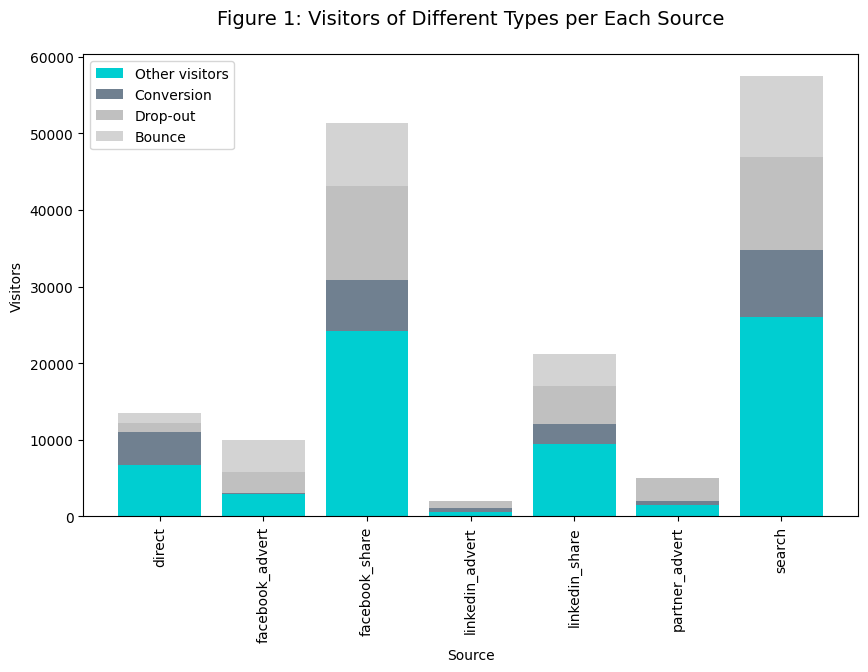

In [77]:
# Codes for Figure 1:

fig, ax = plt.subplots(figsize = (10,6))

colors = ['darkturquoise',
'slategrey',
'silver',
'lightgrey']

sources = list(source_group_df.index)

visitors = np.array(list(source_group_df['Total Visits']))
converted_visitors = np.array(list(source_group_df['Conversion']))
bounced_visitors = np.array(list(source_group_df['Bounce']))
dropped_out_visitors = np.array(list(source_group_df['Drop-out']))

other_visitors = []

for index in range(0,len(visitors)):
    
    other_visitor = visitors[index] - (converted_visitors[index] + bounced_visitors[index] + dropped_out_visitors[index])
    other_visitors.append(other_visitor)

other_visitors =  np.array(other_visitors)

plt.bar(sources, other_visitors , color=colors[0])
plt.bar(sources, converted_visitors , bottom= other_visitors, color=colors[1])
plt.bar(sources, dropped_out_visitors, bottom=other_visitors+converted_visitors, color=colors[2])
plt.bar(sources, bounced_visitors, bottom=other_visitors+converted_visitors+dropped_out_visitors, color=colors[3])

plt.xticks(rotation=90)

plt.xlabel("Source")
plt.ylabel("Visitors")

plt.legend(["Other visitors", "Conversion","Drop-out","Bounce"])

plt.title("Figure 1: Visitors of Different Types per Each Source\n", fontsize=14)

plt.show()

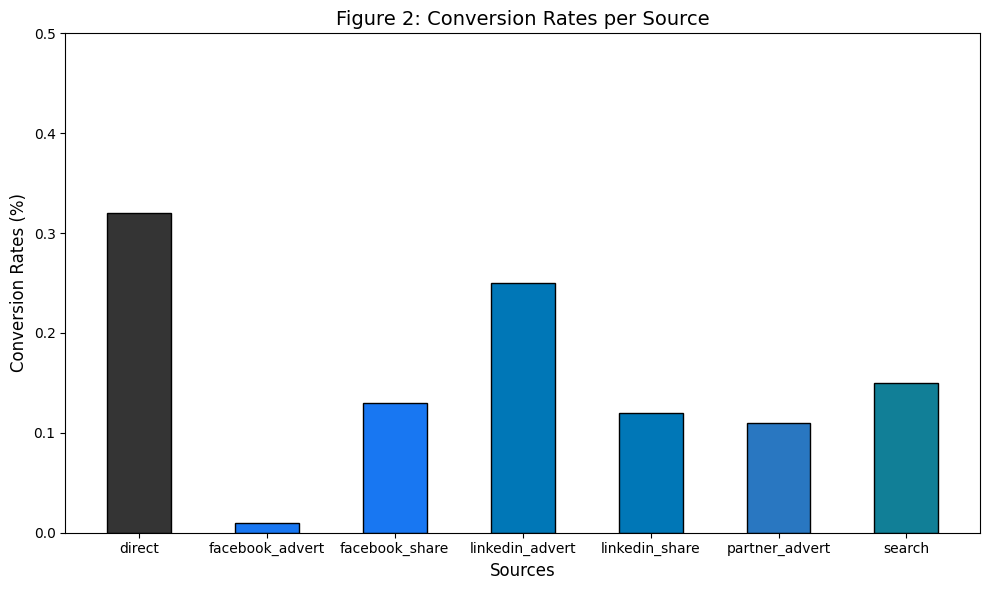

In [99]:
# Codes for Figure 2:

conversion_rates = list(source_group_df['Conversion rate'])
sources = list(source_group_df.index)

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Figure 2: Conversion Rates per Source", fontsize=14)

# Assign colors to the bars based on their index
colors = ['#343434' if i == 0 else
          '#1877F2' if i  in [1, 2] else
          '#0077B7' if i in [3, 4] else
          '#2977C1' if i == 5 else 
          '#117F97' for i in range(len(sources))]

ax.bar(sources, conversion_rates, width=0.5, edgecolor='black', color=colors)

ax.set_xlabel("Sources", fontsize=12)
ax.set_ylabel("Conversion Rates (%)", fontsize=12)

ax.set_ylim(0,0.5)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

(0.15, 0.3)

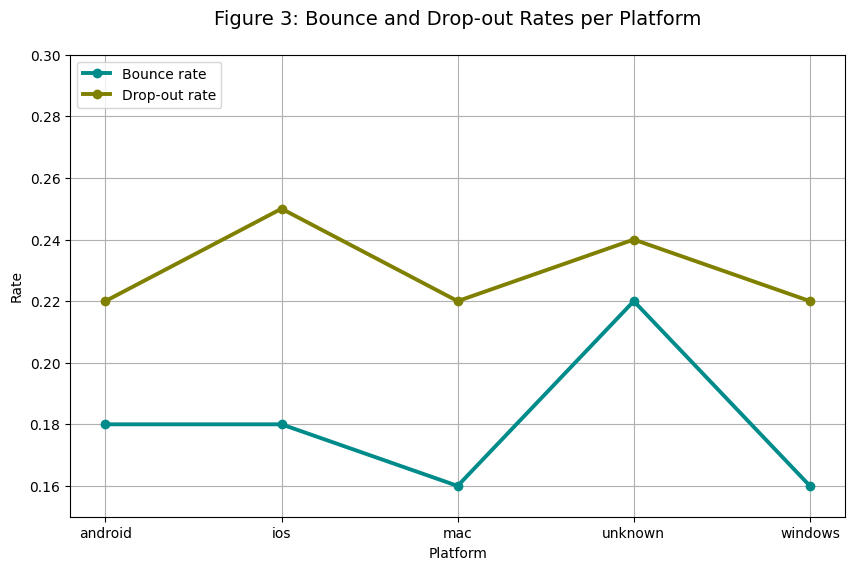

In [79]:
# Codes for Figure 3:

bounce_rates = list(platform_group_df['Bounce rate'])
drop_out_rates = list(platform_group_df['Drop-out rate'])

fig, ax = plt.subplots(figsize = (10,6))

platforms = list(platform_group_df.index)

plt.plot(platforms , bounce_rates , linewidth=2.8 , color = 'darkcyan', label='Bounce rate', marker='o')
plt.plot(platforms , drop_out_rates , linewidth=2.8 , color = 'olive', label='Drop-out rate', marker='o')

ax.set_title("Figure 3: Bounce and Drop-out Rates per Platform\n", fontsize=14)

ax.set_xlabel("Platform")
ax.set_ylabel("Rate")

plt.grid(axis='both')

ax.set_xticklabels(platforms)

plt.legend(loc='upper left')

plt.ylim([0.15,0.3])